<a href="https://colab.research.google.com/github/IlhamMaulanaHadinanda/Bengkel-Koding/blob/main/capstoneProject_14430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bengkel Koding
### Nama : Ilham Maulana Hadinanda
### NIM : A11.2022.14430
### Kelp : Bengkel Koding - DS03

In [1]:
!pip install imbalanced-learn

Perintah !pip install imbalanced-learn digunakan untuk menginstal pustaka Python bernama imbalanced-learn. Pustaka ini sangat berguna ketika kita bekerja dengan dataset yang tidak seimbang

In [2]:
import numpy as np, pandas as pd, time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("ObesityDataSet.csv")

Baris kode digunakan untuk membaca file dataset bernama ObesityDataSet.csv dan memuatnya ke dalam sebuah DataFrame pandas yang dinamai df.

In [4]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Perintah digunakan untuk menampilkan lima baris pertama dari DataFrame df, yang dalam konteks ini adalah data yang telah dibaca dari file ObesityDataSet.csv.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Perintah digunakan untuk menampilkan ringkasan struktur DataFrame df.

In [6]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Perintah digunakan untuk menampilkan ringkasan statistik deskriptif dari kolom-kolom numerik dalam DataFrame df

In [7]:
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


Perintah digunakan untuk mengecek jumlah data yang hilang (missing/null) di setiap kolom dalam DataFrame df

In [8]:
print(df.duplicated().sum())

18


Perintah digunakan untuk menghitung dan mencetak jumlah baris duplikat dalam DataFrame df.

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Age: 1394
Gender: 3
Height: 1562
Weight: 1518
CALC: 5
FAVC: 3
FCVC: 808
NCP: 637
SCC: 3
SMOKE: 3
CH2O: 1263
family_history_with_overweight: 3
FAF: 1186
TUE: 1130
CAEC: 5
MTRANS: 6
NObeyesdad: 7


Perintah berikut digunakan untuk menampilkan jumlah nilai unik di setiap kolom dalam DataFrame df:

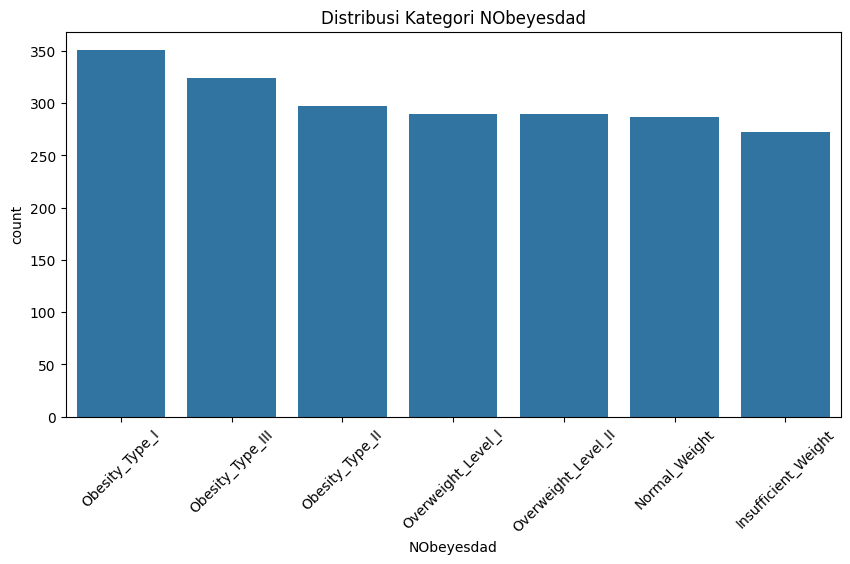

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kategori NObeyesdad')
plt.xticks(rotation=45)
plt.show()

Kode berikut digunakan untuk memvisualisasikan distribusi kategori dari kolom NObeyesdad dalam dataset menggunakan diagram batang (countplot)

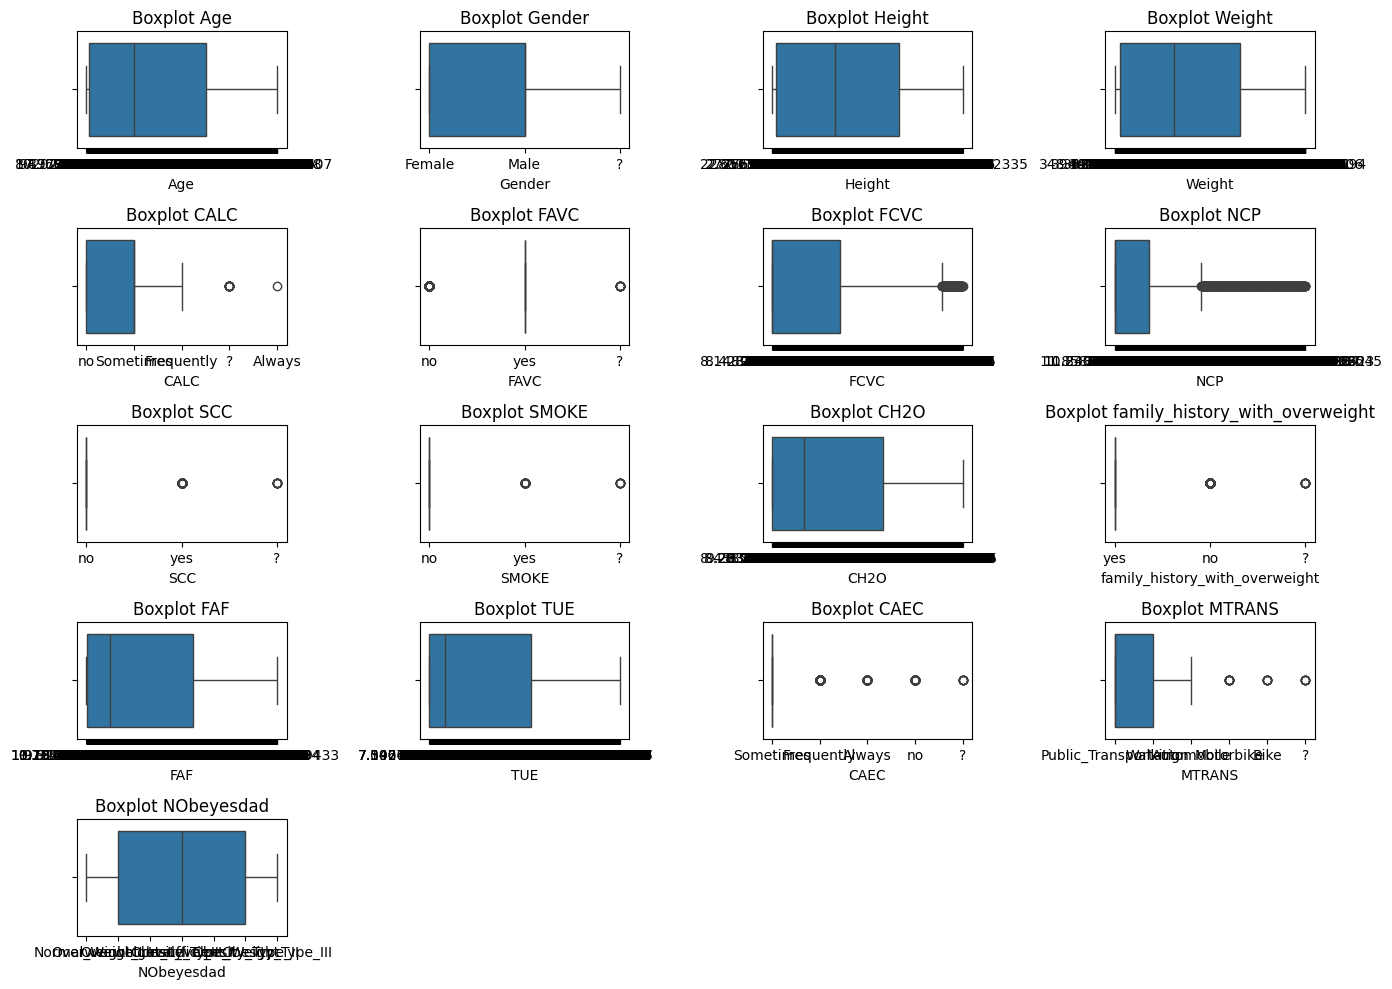

In [11]:
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Kode ini digunakan untuk membuat beberapa boxplot sekaligus untuk semua kolom dalam DataFrame df, lalu menampilkannya dalam format grid (kotak-kotak)

In [12]:
# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        # Untuk kolom numerik, isi dengan median
        df[column] = df[column].fillna(df[column].median())

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())


Missing values setelah pembersihan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Kode ini digunakan untuk menangani missing values (nilai yang hilang) dalam dataset df secara otomatis, tergantung pada tipe data setiap kolom. Tujuannya adalah agar semua nilai kosong diisi dengan cara yang masuk akal sebelum data digunakan dalam pemodelan machine learning.

In [13]:
df.drop_duplicates(inplace=True)

print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


Kode ini digunakan untuk menghapus baris-baris duplikat dari DataFrame df dan memastikan bahwa tidak ada data yang sama persis secara keseluruhan di baris yang berbeda

In [14]:
categorical_cols = ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC',	'NCP', 'SCC', 'SMOKE', 'CH2O', 'FAF', 'TUE',
                    'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalisasi kolom numerik
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include='int64').drop(columns=['NObeyesdad']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Label Encoding adalah teknik untuk mengonversi data kategorikal menjadi numerik, yang sangat berguna ketika algoritma machine learning membutuhkan input dalam bentuk angka.

Normalisasi terhadap kolom numerik untuk memastikan semua fitur numerik berada pada skala yang sama, yang membantu beberapa algoritma machine learning (misalnya, regresi linear, KNN, dll) dalam konvergensi lebih cepat.

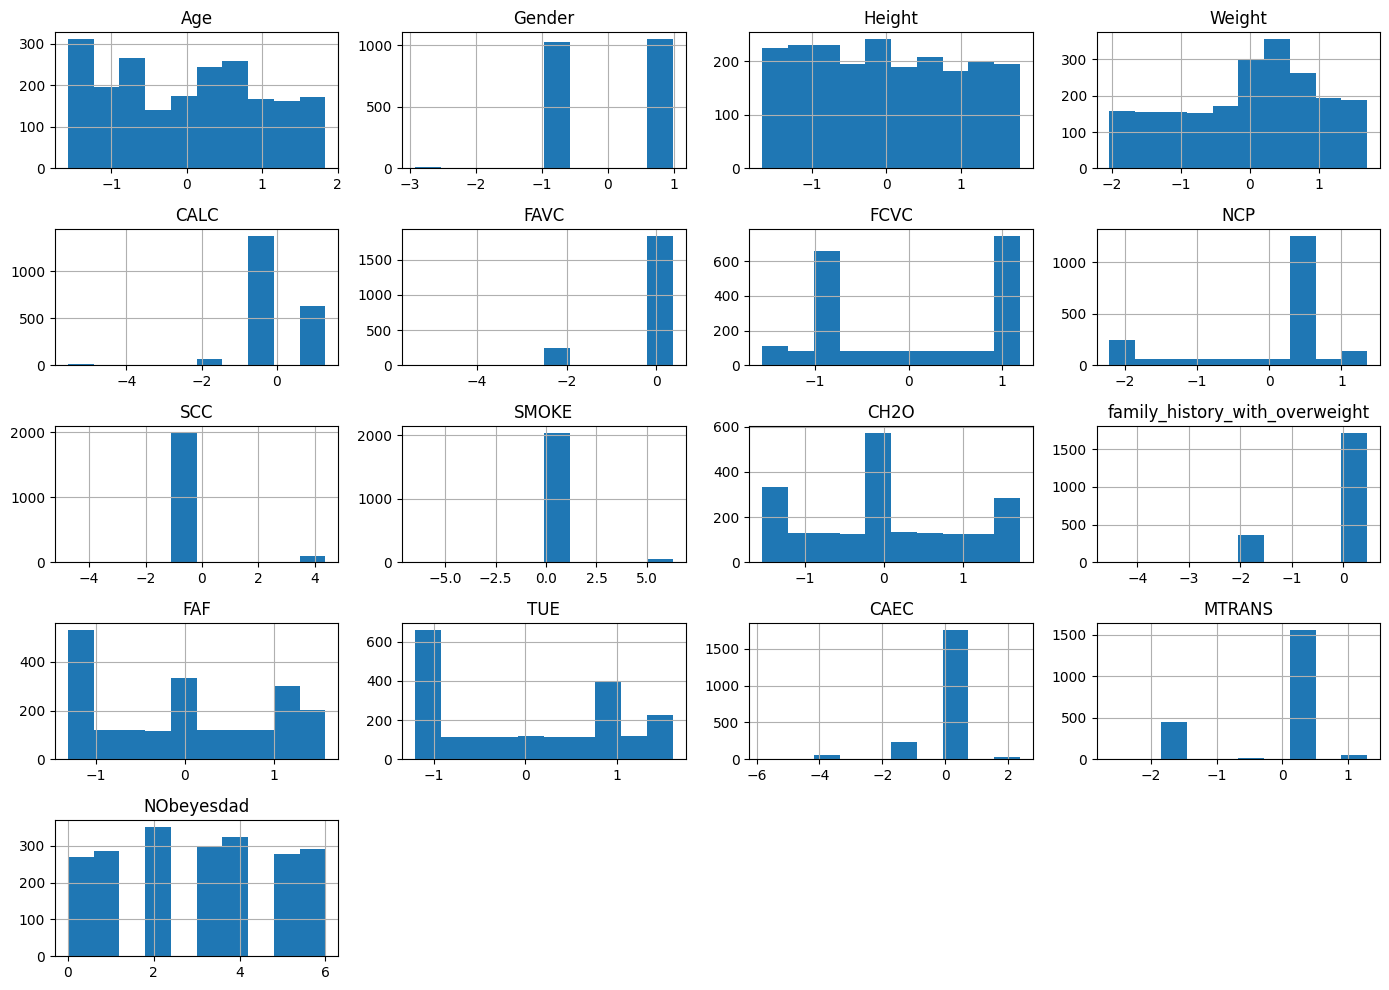

In [15]:
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

Membuat histogram untuk seluruh kolom numerik dalam DataFrame df untuk melihat distribusi data numerik.

In [16]:
# Hapus outlier dari semua kolom numerik
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Kode ini digunakan untuk menghapus outlie dari semua kolom numerik dalam DataFrame df, menggunakan metode IQR (Interquartile Range).

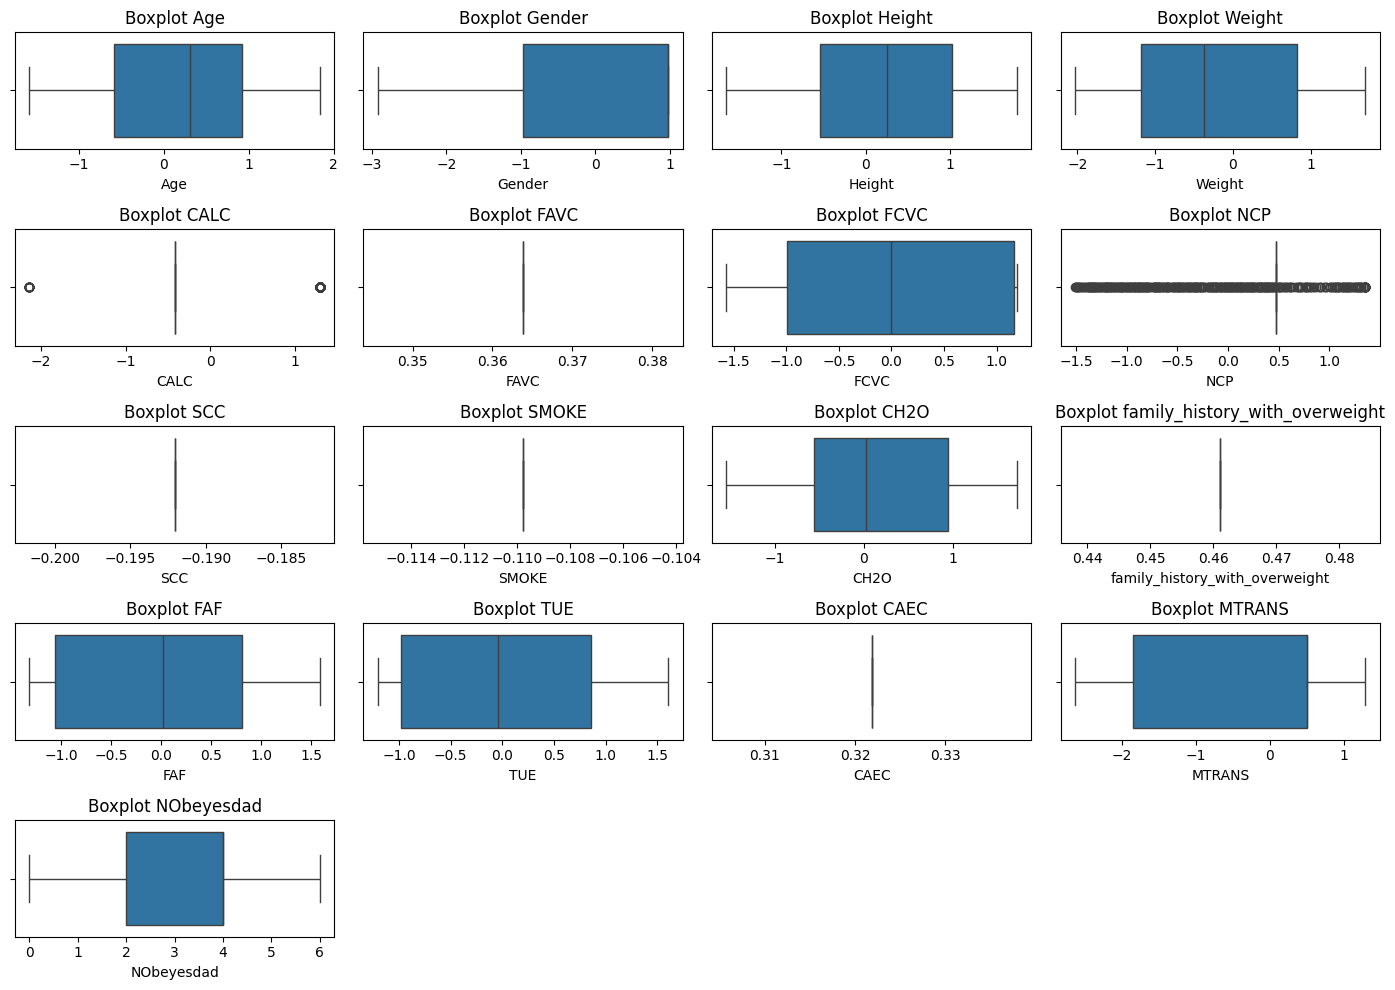

In [17]:
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Kode ini digunakan untuk menampilkan ulang boxplot dari seluruh kolom dalam DataFrame df setelah dilakukan proses pembersihan outlier. Tujuan visualisasi ini adalah untuk mengecek apakah outlier telah berhasil dihapus dari setiap kolom numerik, serta memverifikasi bentuk distribusi data.

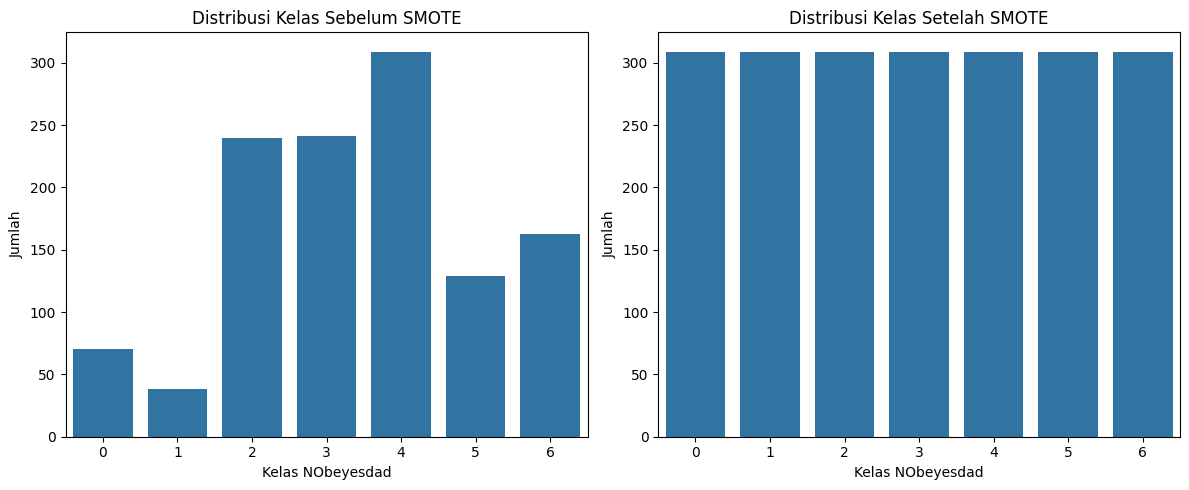

Distribusi sebelum SMOTE:
 NObeyesdad
4    309
3    241
2    240
6    163
5    129
0     70
1     38
Name: count, dtype: int64

Distribusi setelah SMOTE:
 NObeyesdad
1    309
6    309
5    309
0    309
2    309
3    309
4    309
Name: count, dtype: int64


In [18]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Visualisasi sebelum SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas NObeyesdad')
plt.ylabel('Jumlah')

# SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Visualisasi setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_res)
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Kelas NObeyesdad')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

print("Distribusi sebelum SMOTE:\n", y.value_counts())
print("\nDistribusi setelah SMOTE:\n", y_res.value_counts())

Kode ini digunakan untuk menangani ketidakseimbangan kelas (class imbalance) dalam dataset target NObeyesdad menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique). Proses ini penting karena ketidakseimbangan kelas dapat menyebabkan model machine learning bias terhadap kelas mayoritas.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Buat dictionary untuk menyimpan model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

Kode ini digunakan untuk membagi data latih dan uji, serta menyiapkan beberapa model machine learning berbeda dalam sebuah struktur yang rapi (dictionary) agar bisa dibandingkan performanya secara sistematis nanti.


Training Decision Tree...
Training selesai dalam 0.0148 detik

Evaluasi Model: Decision Tree
Akurasi: 0.9469

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.96      0.96      0.96        56
           2       0.89      0.88      0.89        67
           3       0.92      0.92      0.92        65
           4       1.00      0.95      0.97        58
           5       1.00      0.95      0.98        64
           6       0.90      0.98      0.94        66

    accuracy                           0.95       433
   macro avg       0.95      0.95      0.95       433
weighted avg       0.95      0.95      0.95       433


Confusion Matrix:


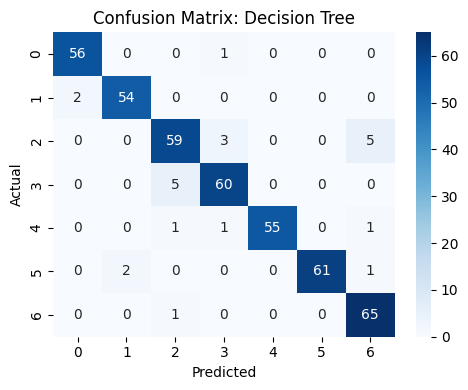


Training Random Forest...
Training selesai dalam 0.4238 detik

Evaluasi Model: Random Forest
Akurasi: 0.9815

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.98      1.00      0.99        56
           2       0.96      0.97      0.96        67
           3       1.00      1.00      1.00        65
           4       1.00      0.97      0.98        58
           5       0.97      0.98      0.98        64
           6       0.97      0.95      0.96        66

    accuracy                           0.98       433
   macro avg       0.98      0.98      0.98       433
weighted avg       0.98      0.98      0.98       433


Confusion Matrix:


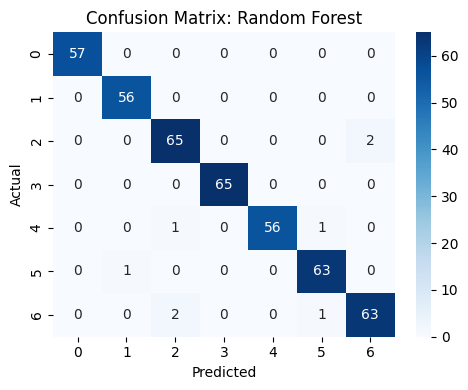


Training KNN...
Training selesai dalam 0.0036 detik

Evaluasi Model: KNN
Akurasi: 0.9423

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       0.90      0.95      0.92        56
           2       0.95      0.84      0.89        67
           3       0.98      1.00      0.99        65
           4       1.00      1.00      1.00        58
           5       0.92      0.94      0.93        64
           6       0.89      0.89      0.89        66

    accuracy                           0.94       433
   macro avg       0.94      0.94      0.94       433
weighted avg       0.94      0.94      0.94       433


Confusion Matrix:


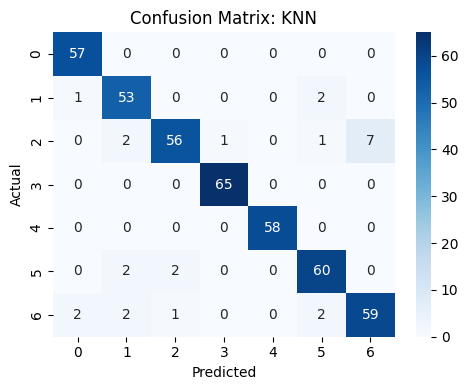


Training Logistic Regression...
Training selesai dalam 0.0582 detik

Evaluasi Model: Logistic Regression
Akurasi: 0.7113

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        57
           1       0.71      0.66      0.69        56
           2       0.50      0.28      0.36        67
           3       0.85      0.94      0.89        65
           4       0.98      0.95      0.96        58
           5       0.54      0.62      0.58        64
           6       0.51      0.61      0.56        66

    accuracy                           0.71       433
   macro avg       0.71      0.72      0.71       433
weighted avg       0.70      0.71      0.70       433


Confusion Matrix:


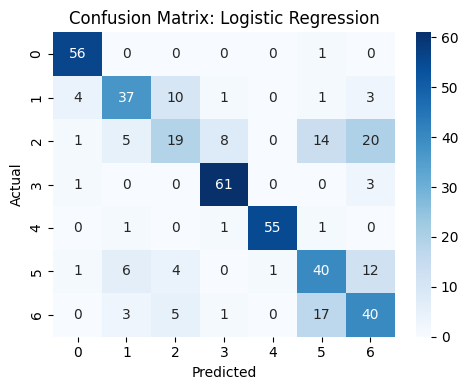

In [20]:
accuracies = {}
for name, model in models.items():
    print(f"\n{'='*50}\nTraining {name}...")

    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"Training selesai dalam {training_time:.4f} detik")

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': class_report['weighted avg']['precision'],
        'recall': class_report['weighted avg']['recall'],
        'f1-score': class_report['weighted avg']['f1-score'],
        'training_time': training_time,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

    print(f"\nEvaluasi Model: {name}")
    print(f"Akurasi: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Kode ini melakukan proses pelatihan, prediksi, evaluasi, dan visualisasi untuk beberapa model machine learning sekaligus. Setiap model dalam dictionary models dilatih dan dievaluasi secara berurutan, kemudian hasilnya disimpan dan divisualisasikan untuk analisis perbandingan.

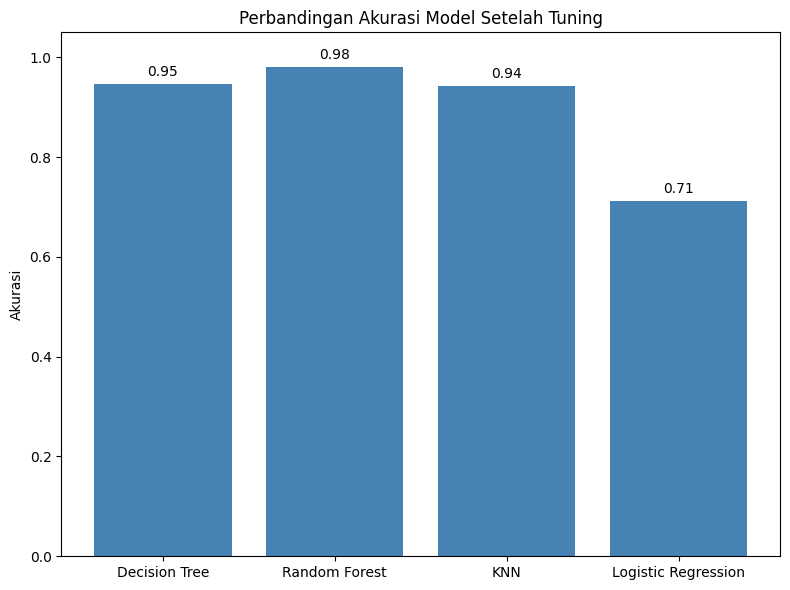

In [21]:
plt.figure(figsize=(8, 6))
models = list(accuracies.keys())
scores = list(accuracies.values())
bars = plt.bar(models, scores, color='steelblue')

# Tambahkan label akurasi di atas bar
for bar, acc in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{acc:.2f}", ha='center', va='bottom')

plt.ylim(0, 1.05)
plt.title("Perbandingan Akurasi Model Setelah Tuning")
plt.ylabel("Akurasi")
plt.tight_layout()
plt.show()

Kode ini digunakan untuk membuat visualisasi perbandingan akurasi dari beberapa model klasifikasi yang telah Anda latih dan evaluasi sebelumnya.

In [22]:
param_grids = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        }
    }
}

Kode ini digunakan untuk mendefinisikan ruang pencarian hyperparameter (param_grids) yang akan digunakan dalam proses hyperparameter tuning dengan metode seperti RandomizedSearchCV. Tujuannya adalah untuk mencari kombinasi parameter terbaik bagi masing-masing model agar performanya maksimal.


Tuning Decision Tree...
Best params: {'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': 20}
Accuracy: 0.9538
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.95      0.96      0.96        56
           2       0.91      0.93      0.92        67
           3       0.95      0.94      0.95        65
           4       1.00      0.95      0.97        58
           5       1.00      0.95      0.98        64
           6       0.91      0.97      0.94        66

    accuracy                           0.95       433
   macro avg       0.96      0.95      0.95       433
weighted avg       0.95      0.95      0.95       433



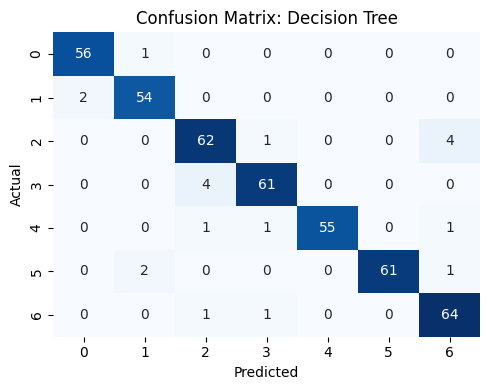


Tuning Random Forest...
Best params: {'clf__n_estimators': 200, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': 10}
Accuracy: 0.9861
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        56
           2       0.98      0.96      0.97        67
           3       1.00      1.00      1.00        65
           4       1.00      0.97      0.98        58
           5       0.97      1.00      0.98        64
           6       0.96      0.98      0.97        66

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



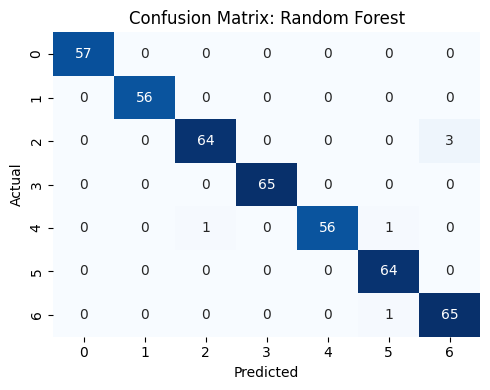


Tuning KNN...
Best params: {'clf__weights': 'distance', 'clf__n_neighbors': 3, 'clf__metric': 'manhattan'}
Accuracy: 0.9861
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       1.00      0.98      0.99        56
           2       0.99      0.99      0.99        67
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00        58
           5       0.98      0.98      0.98        64
           6       0.97      0.95      0.96        66

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



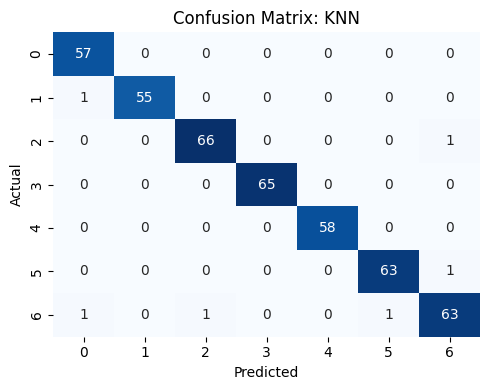


Tuning Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params: {'clf__solver': 'lbfgs', 'clf__penalty': 'l2', 'clf__C': 1}
Accuracy: 0.7067
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        57
           1       0.69      0.66      0.67        56
           2       0.51      0.28      0.37        67
           3       0.85      0.94      0.89        65
           4       0.98      0.95      0.96        58
           5       0.53      0.62      0.58        64
           6       0.50      0.58      0.54        66

    accuracy                           0.71       433
   macro avg       0.71      0.72      0.71       433
weighted avg       0.70      0.71      0.70       433



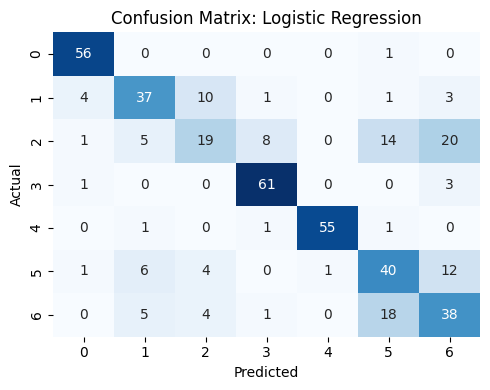

In [23]:
after_accuracies = {}
for name, config in param_grids.items():
    print(f"\nTuning {name}...")

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', config['model'])
    ])

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions={f'clf__{k}': v for k, v in config['params'].items()},
        n_iter=10,
        scoring='accuracy',
        cv=3,
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    after_accuracies[name] = acc

    acc = accuracy_score(y_test, y_pred)
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Visualisasi confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Kode ini menjalankan hyperparameter tuning otomatis untuk setiap model dalam param_grids, menggunakan RandomizedSearchCV dalam pipeline, lalu mengevaluasi performa model terbaik

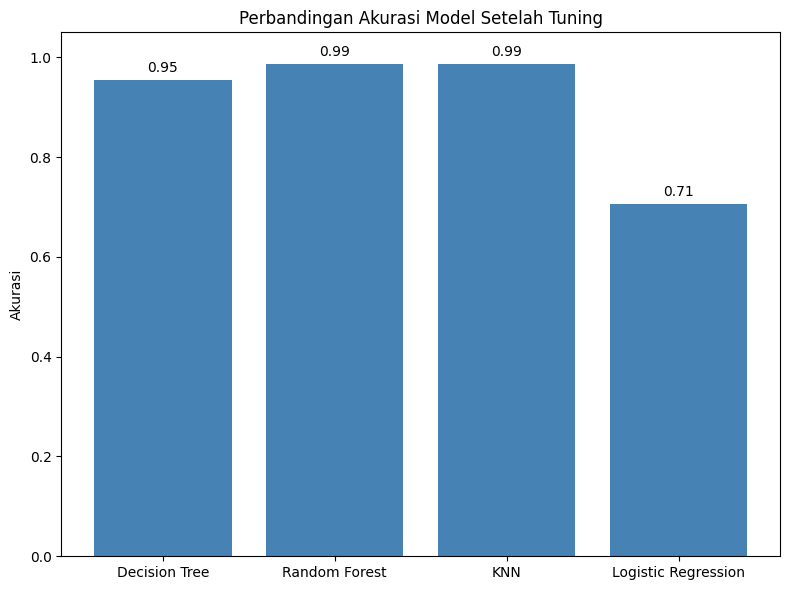

In [24]:
# Visualisasi perbandingan akurasi setelah tuning
plt.figure(figsize=(8, 6))
models = list(after_accuracies.keys())
scores = list(after_accuracies.values())
bars = plt.bar(models, scores, color='steelblue')

# Tambahkan label akurasi di atas bar
for bar, acc in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{acc:.2f}", ha='center', va='bottom')

plt.ylim(0, 1.05)
plt.title("Perbandingan Akurasi Model Setelah Tuning")
plt.ylabel("Akurasi")
plt.tight_layout()
plt.show()

Kode ini digunakan untuk memvisualisasikan perbandingan akurasi model setelah proses hyperparameter tuning. Tujuannya adalah untuk menunjukkan sejauh mana tuning meningkatkan performa tiap model